# Titanic Dataset Analysis

## Importing Libraries & Dataset


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [4]:
data=pd.read_csv('titanic_train_dc904cdc-94af-4bfb-b2b8-240e0af633f7.csv')

## Initial Exploration

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.shape

(891, 12)

**Shape**: `(891, 12)` → 891 passengers and 12 features.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Describe**:  
  - Average age ~ 29.7  
  - Average fare ~ 32.2 (but max = 512, highly skewed)  
  - Survival rate ~ 38% (only 342 survived).

In [8]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


**Missing Cells**:  
  - Age → 177 missing  
  - Cabin → 687 missing  
  - Embarked → 2 missing

## Data Cleaning and Preprocessing

#### Making a copy of the dataframe to keep the original untouched

In [9]:
data_cleaned = data.copy()

#### Filling missing Age values with the median Age

In [10]:
median_age = data_cleaned['Age'].median()
data_cleaned['Age'] = data_cleaned['Age'].fillna(median_age)

#### Filling missing Embarked values with the mode

In [11]:
mode_embarked = data_cleaned['Embarked'].mode()[0]
data_cleaned['Embarked'] = data_cleaned['Embarked'].fillna(mode_embarked)

#### Dropping the Cabin column due to a large number of missing values

In [12]:
data_cleaned.drop('Cabin', axis=1, inplace=True)

### Verifying the changes

In [13]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [14]:
data_cleaned.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


Final dataset has **no missing values**.

In [15]:
data_cleaned.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Data Analysis

### Survival Distribution

In [16]:
data_cleaned[['Survived']].value_counts()

,count
Survived,
0,549
1,342


Only **342 survived** vs **549 died**.

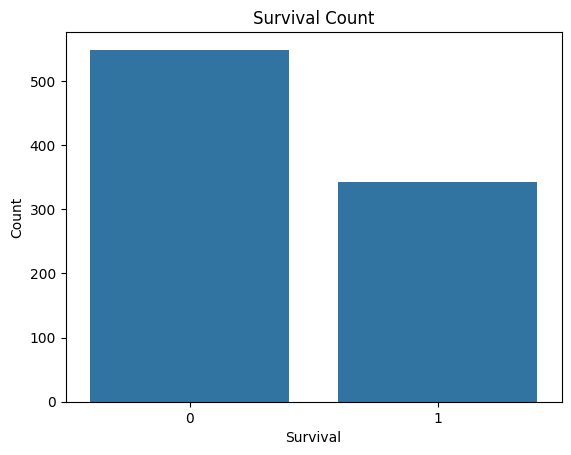

In [17]:
sns.countplot(x='Survived', data=data_cleaned)
plt.title('Survival Count')
plt.xlabel('Survival')
plt.ylabel('Count')
plt.show()

In [18]:
survival_rate=(data_cleaned['Survived'].sum()/len(data_cleaned))*100
print(f'The survival rate is {survival_rate:.2f}%')

The survival rate is 38.38%


### Passenger Class Analysis

In [19]:
data_cleaned[['Pclass']].value_counts()

,count
Pclass,
3,491
1,216
2,184


Most passengers were in **3rd class**.

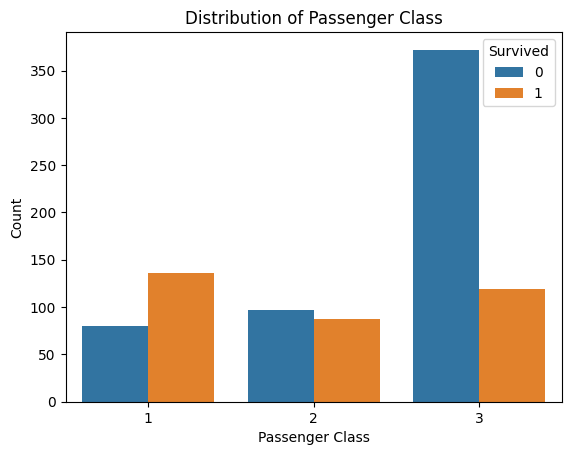

In [20]:
sns.countplot(x='Pclass', hue='Survived', data=data_cleaned)
plt.title('Distribution of Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

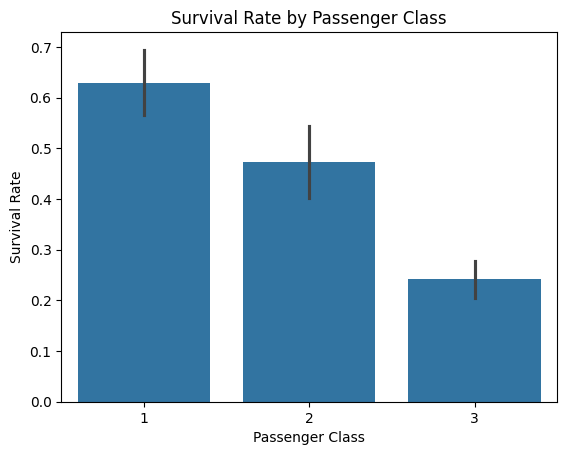

In [21]:
sns.barplot(x='Pclass', y='Survived', data=data_cleaned)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

**Survival by Class**:  
  - 1st class → highest survival  
  - 3rd class → lowest survival  

Wealth/class strongly influenced chances of survival.

### Gender Analysis

In [22]:
data_cleaned[['Sex']].value_counts()

,count
Sex,
male,577
female,314


Count: 577 males, 314 females.

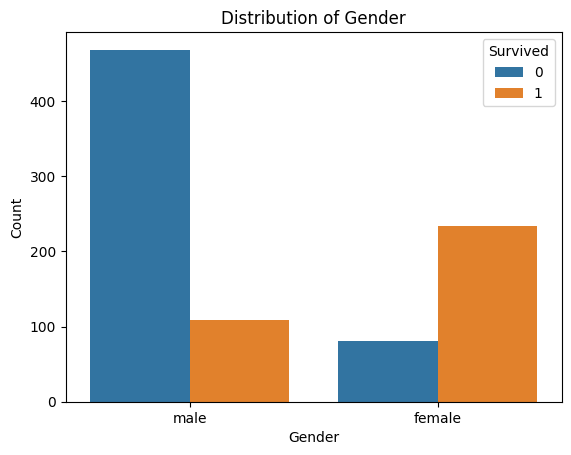

In [23]:
sns.countplot(x='Sex', hue='Survived', data=data_cleaned)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

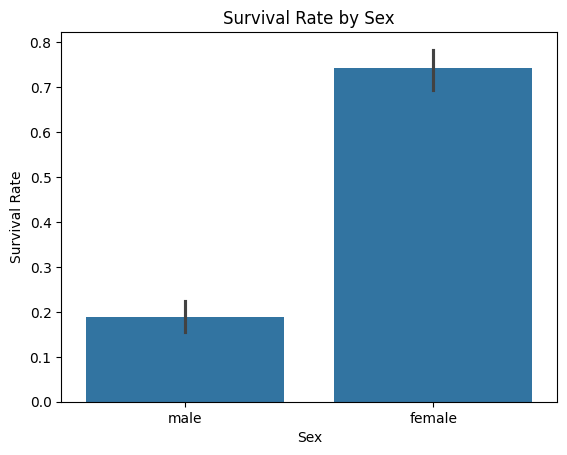

In [24]:
sns.barplot(x='Sex', y='Survived', data=data_cleaned)
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

**Survival**:  
  - Women survived much more than men.  
  - Most men died.  

Confirms **“Women and children first” policy** during evacuation.

### Embarkation Port Analysis

Ports: Southampton (S), Cherbourg (C), Queenstown (Q).

In [25]:
data_cleaned[['Embarked']].value_counts()

,count
Embarked,
S,646
C,168
Q,77


**Counts**: Majority from Southampton.

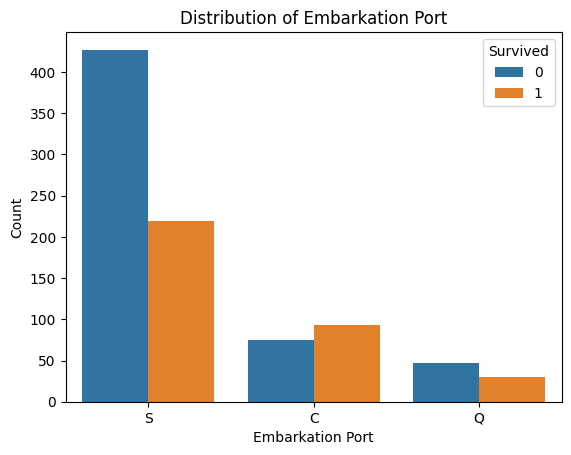

In [26]:
sns.countplot(x='Embarked', hue='Survived', data=data_cleaned)
plt.title('Distribution of Embarkation Port')
plt.xlabel('Embarkation Port')
plt.ylabel('Count')
plt.show()

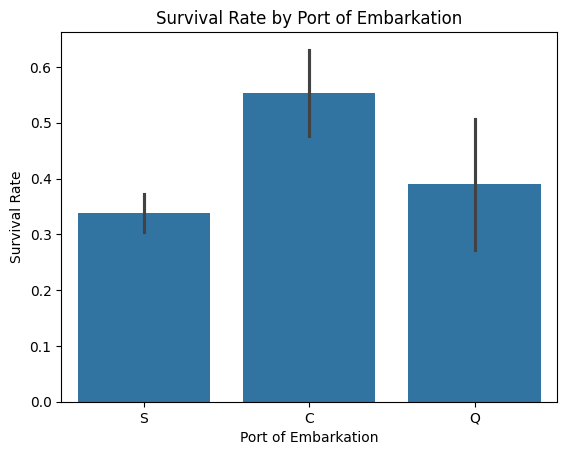

In [27]:
sns.barplot(x='Embarked', y='Survived', data=data_cleaned)
plt.title('Survival Rate by Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Survival Rate')
plt.show()

**Survival rates**:  
  - Cherbourg (C) → highest survival  
  - Southampton (S) → lowest survival  
  
Port of embarkation played a role in survival.

### Age Distribution

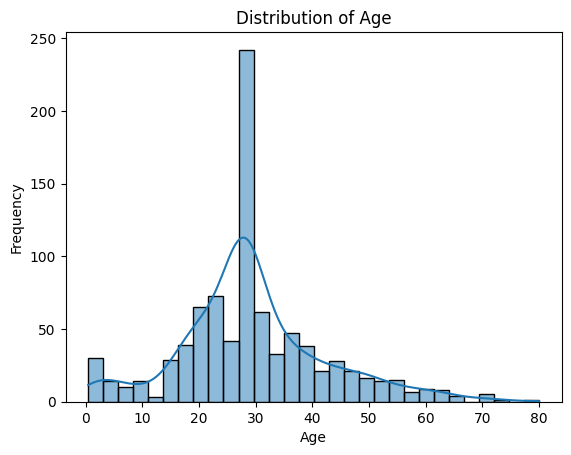

In [28]:
sns.histplot(data_cleaned['Age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**Histogram**: Most passengers between 20–40 years.

Text(0, 0.5, 'Age')

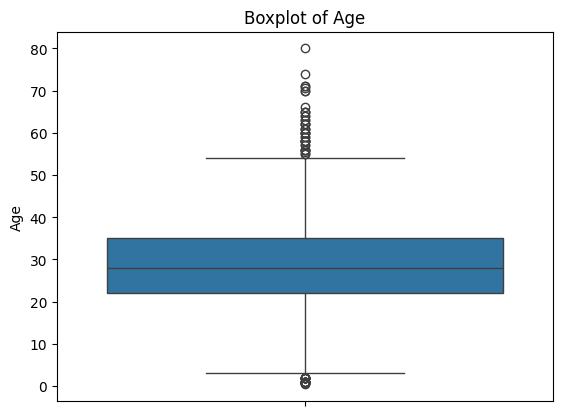

In [29]:
sns.boxplot(y='Age', data=data_cleaned)
plt.title('Boxplot of Age')
plt.ylabel('Age')

**Boxplot**: Outliers include children and very old passengers.

Text(0.5, 0, 'Theoretical Quantiles')

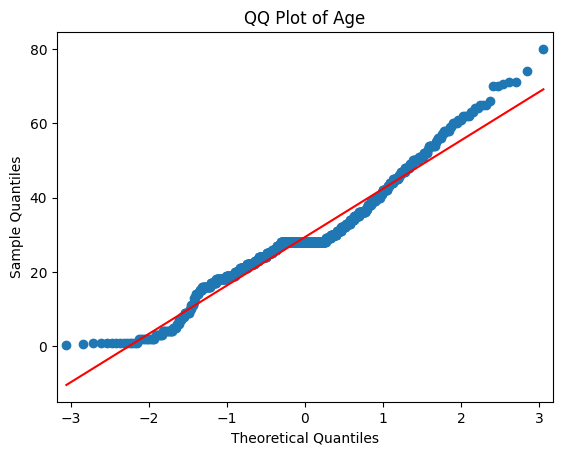

In [30]:
sm.qqplot(data_cleaned['Age'], line='s')
plt.title('QQ Plot of Age')
plt.xlabel('Theoretical Quantiles')

**QQ plot**: Roughly normal distribution, but with heavy tails.

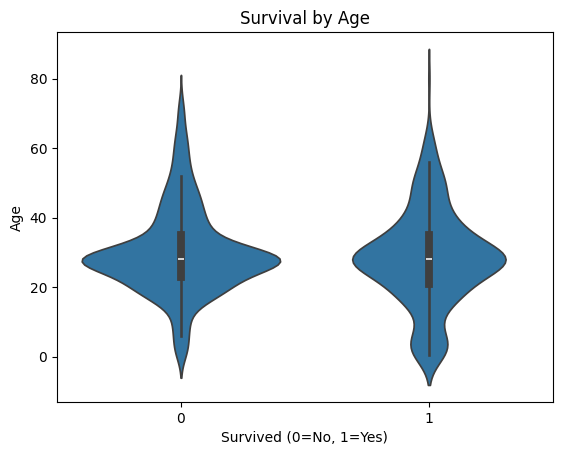

In [31]:
sns.violinplot(x='Survived', y='Age', data=data_cleaned)
plt.title('Survival by Age')
plt.xlabel('Survived (0=No, 1=Yes)')
plt.ylabel('Age')
plt.show()

**Violin plot**:  
  - Children had higher survival probability.  
  - Older passengers had lower survival.

### Fare Distribution

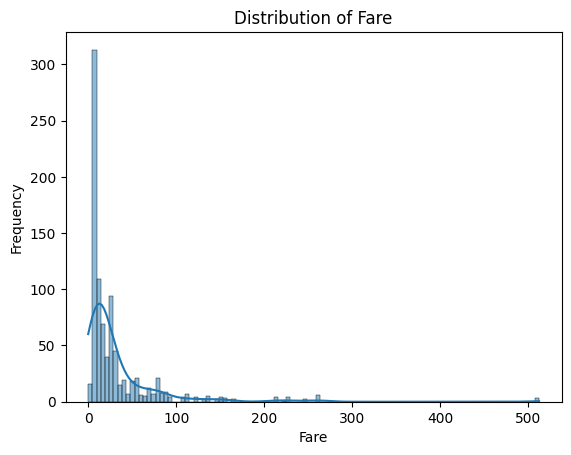

In [32]:
sns.histplot(data_cleaned['Fare'], kde=True)
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

**Histogram**: Strongly right-skewed. Most fares < 50.

Text(0, 0.5, 'Fare')

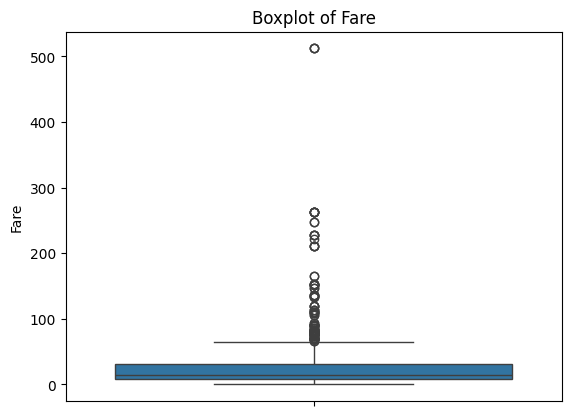

In [33]:
sns.boxplot(y='Fare', data=data_cleaned)
plt.title('Boxplot of Fare')
plt.ylabel('Fare')

**Boxplot**: Outliers → very wealthy passengers.

Text(0.5, 0, 'Theoretical Quantiles')

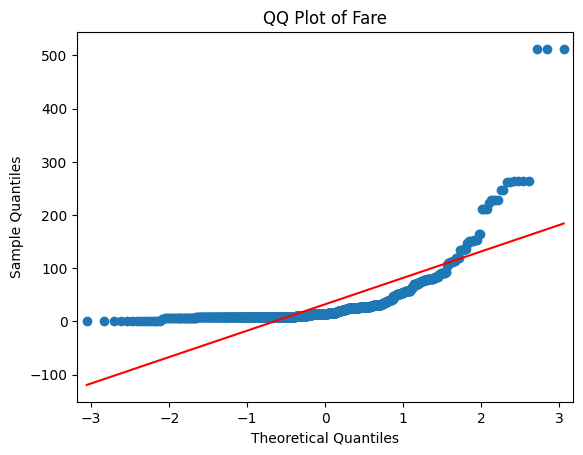

In [34]:
sm.qqplot(data_cleaned['Fare'], line='s')
plt.title('QQ Plot of Fare')
plt.xlabel('Theoretical Quantiles')

**QQ plot**: Deviates heavily from normal due to skewness.

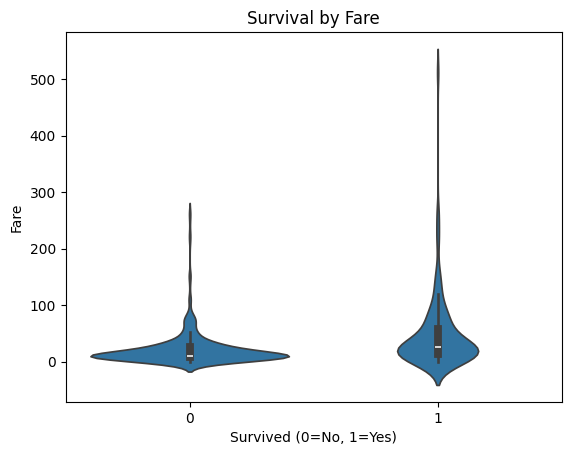

In [35]:
sns.violinplot(x='Survived', y='Fare', data=data_cleaned)
plt.title('Survival by Fare')
plt.xlabel('Survived (0=No, 1=Yes)')
plt.ylabel('Fare')
plt.show()

**Violin plot**:  
  - Higher fare → higher survival.  
  - Wealthier passengers had better chances.

#### Age vs Fare Scatter Plot (Survival)

Scatter plot shows how **Age** and **Fare** together relate to survival.

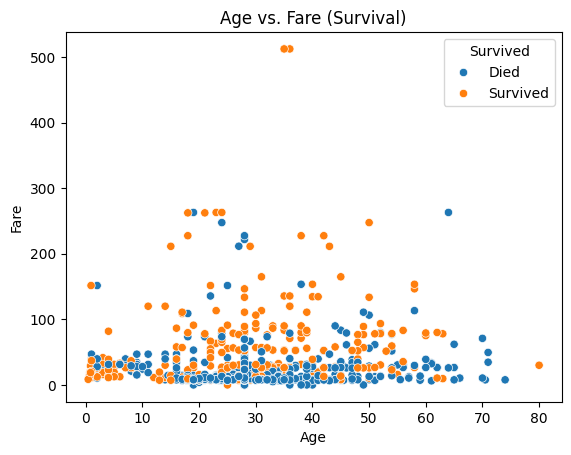

In [36]:
scatter_plot=sns.scatterplot(x='Age', y='Fare', hue='Survived', data=data_cleaned)
plt.title('Age vs. Fare (Survival)')
plt.xlabel('Age')
plt.ylabel('Fare')
handles, labels = scatter_plot.get_legend_handles_labels()
plt.legend(handles=handles, labels=['Died', 'Survived'], title='Survived')

**Trends observed**:
  - Many passengers clustered at lower fares (<50) and ages between 20–40.
  - Younger passengers (especially children) survived more, even at lower fares.
  - Some very old passengers are visible, mostly with lower survival rates.

Conclusion: **Wealth (high fare) and youth (low age)** improved chances of survival.

## Pair Plot of Key Features

The pair plot allows us to visualize relationships between multiple numerical variables at once, while also distinguishing survival status.

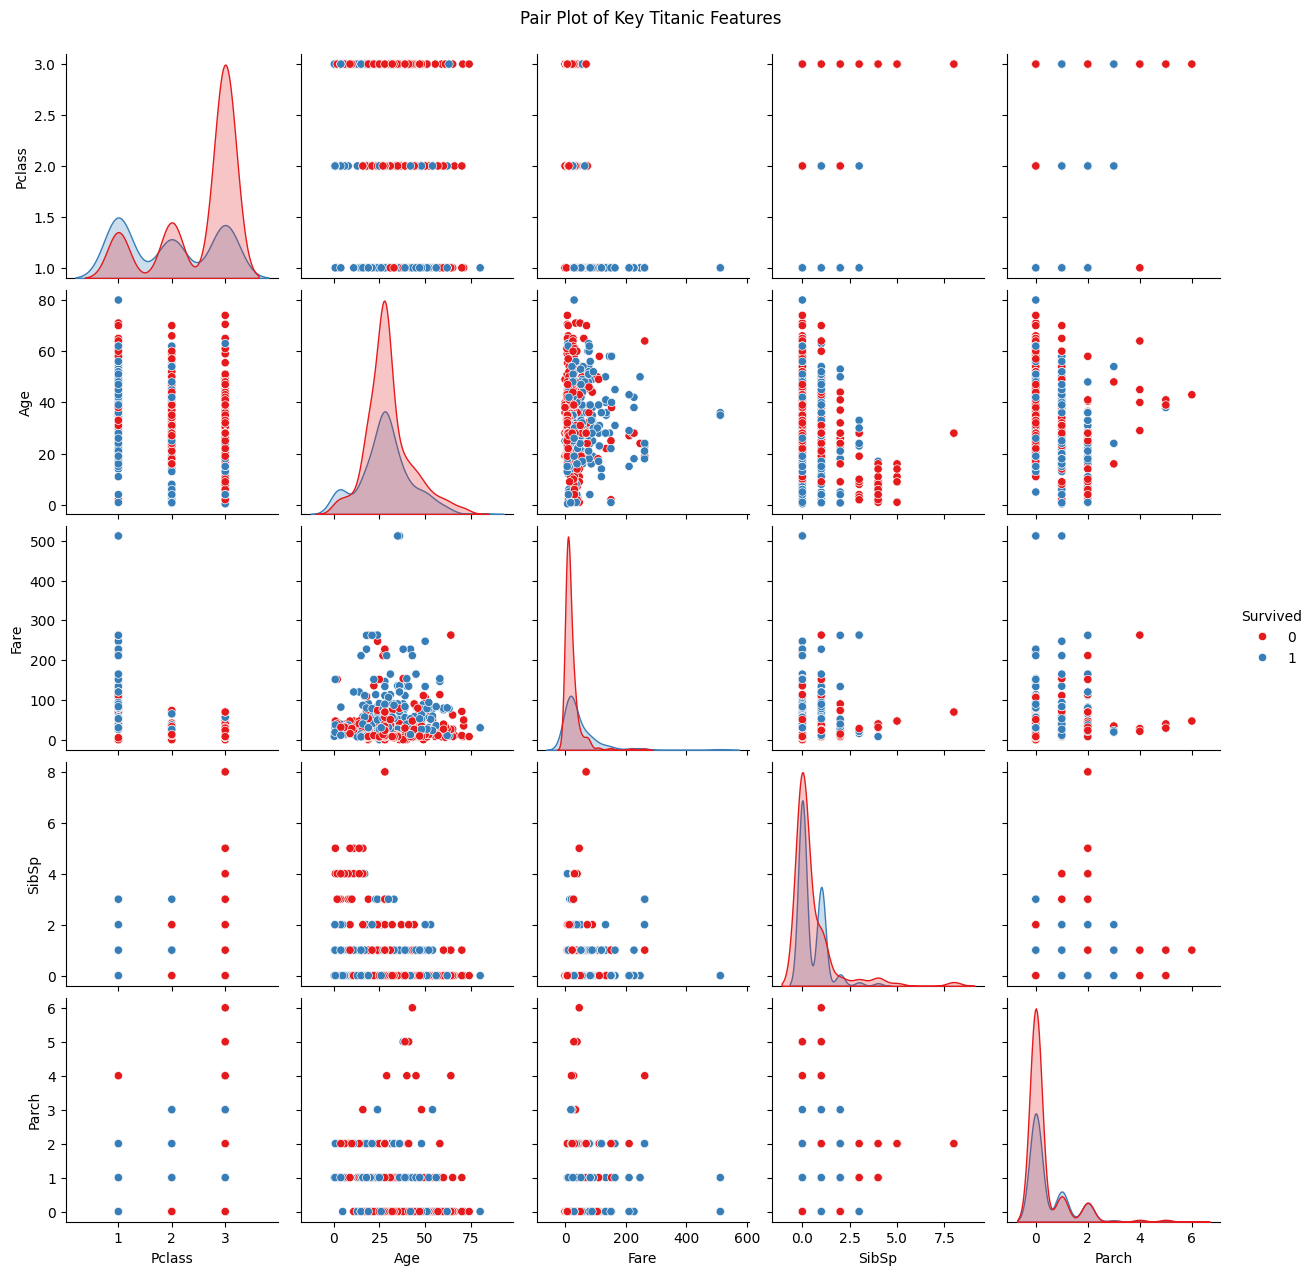

In [37]:
features = ["Survived", "Pclass", "Age", "Fare", "SibSp", "Parch"]

# Creating pairplot
sns.pairplot(data_cleaned[features], hue="Survived", diag_kind="kde", palette="Set1")

plt.suptitle("Pair Plot of Key Titanic Features", y=1.02)
plt.show()

**Observations:**

- **Diagonal plots** (KDEs):  
  - Survived passengers (blue) show different distributions compared to non-survivors (red).  
  - For example, survivors are more concentrated in lower `Pclass` and higher `Fare`.  

- **Pclass vs Fare**:  
  - 1st-class passengers paid higher fares, and survival was more common among them.  
  - 3rd-class passengers (low fares) had poor survival chances.  

- **Age vs Fare**:  
  - Younger children and high-fare passengers had a better chance of survival.  
  - Many adult passengers with low fares did not survive.  

- **SibSp / Parch**:  
  - Most passengers had few or no relatives aboard.  
  - Larger families are rare and survival among them appears lower.


**Conclusion:**

- The pair plot visually confirms that **Sex, Class, Age, and Fare** are strong survival indicators.  
- Survivors cluster in **lower Pclass, higher Fare, and younger Age ranges**.

### Correlation Matrix Heatmap

A correlation matrix shows how numerical variables relate to each other.

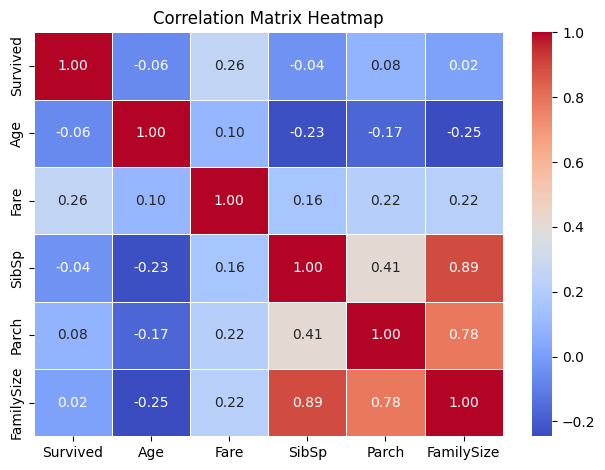

In [38]:
# Creating 'FamilySize' column
data_cleaned['FamilySize'] = data_cleaned['SibSp'] + data_cleaned['Parch'] + 1

# Selecting only the numerical columns for the correlation matrix
numerical_df = data_cleaned[['Survived', 'Age', 'Fare', 'SibSp', 'Parch', 'FamilySize']]

# Calculating the correlation matrix
corr_matrix = numerical_df.corr()

# Creating the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

**Observations:**
  - **Survived** is **negatively correlated** with `Pclass` → higher class (lower Pclass number) = higher survival.
  - **Fare** is **positively correlated** with survival → passengers who paid higher fares had better chances.
  - `SibSp` and `Parch` show weak correlations with survival, but they are positively related to each other (both indicate family aboard).

**Conclusion:**
  - **Pclass and Fare** stand out as important survival indicators.

### Key Insights from the Data (Overall):
- Survival rate = **38%** only.  
- **Sex & Class** were the strongest predictors of survival.  
- **Women, children, and wealthy (1st class) passengers** had the highest chances.  
- Port of embarkation mattered → Cherbourg passengers fared better.  
- Higher fares & younger ages generally improved survival probability.

## Survival Analysis Based on Family Size

### Family Size Definition 1: SibSp + Parch
- Traditional approach:  
  `FamilySize = SibSp + Parch + 1`  
- Captures direct relatives (siblings/spouses + parents/children).  
- Limitation: Misses **non-relatives** or extended families traveling together under one ticket.

In [39]:
# Family size from SibSp + Parch
data_cleaned['FamilySize_v1'] = data_cleaned['SibSp'] + data_cleaned['Parch'] + 1
data_cleaned['FamilySize_v1'].value_counts().sort_index()

,count
FamilySize_v1,
1,537
2,161
3,102
4,29
5,15
6,22
7,12
8,6
11,7


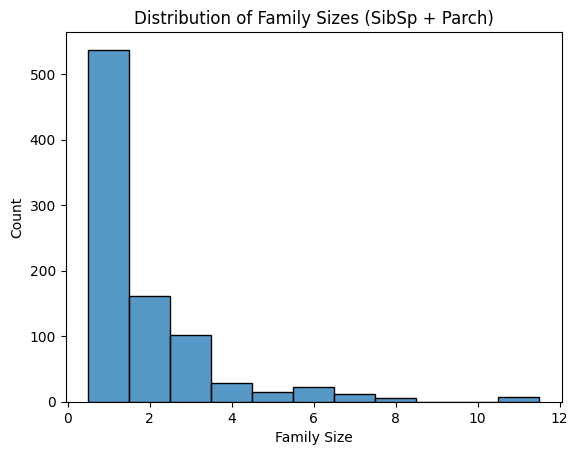

In [42]:
sns.histplot(data_cleaned['FamilySize_v1'], discrete=True, kde=False)
plt.title('Distribution of Family Sizes (SibSp + Parch)')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.show()

In [41]:
data_cleaned.groupby('FamilySize_v1')['Survived'].mean()

,Survived
FamilySize_v1,
1,0.303538
2,0.552795
3,0.578431
4,0.724138
5,0.200000
6,0.136364
7,0.333333
8,0.000000
11,0.000000


/tmp/ipython-input-2876241088.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='FamilySize_v1', y='Survived', data=data_cleaned, palette='Set2', hue=None, legend=False)


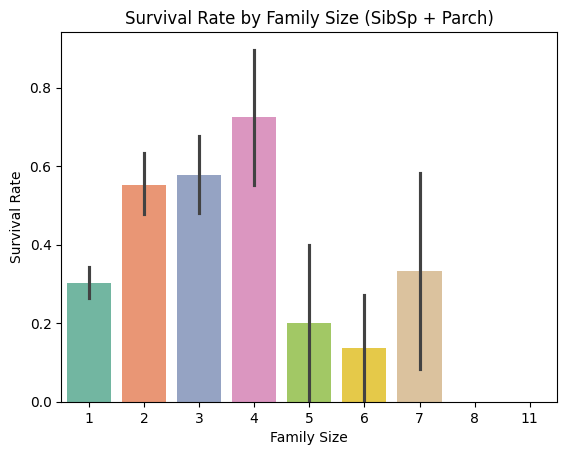

In [43]:
sns.barplot(x='FamilySize_v1', y='Survived', data=data_cleaned, palette='Set2', hue=None, legend=False)
plt.title('Survival Rate by Family Size (SibSp + Parch)')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.show()

**Observations**:
  - Most passengers were either **alone (1)** or in small families (2–3).
  - Survival was relatively higher for families of size 2–4.
  - Very large families (≥7) had very low survival rates.
  

### Family Size Definition 2: Ticket Group Size
- Many passengers **shared the same ticket**.  
- We count the number of passengers associated with each ticket → `TicketGroupSize`.  
- This captures families and friend groups who bought tickets together.  
- Still imperfect: different families may share a ticket class coincidentally.

In [44]:
ticket_counts = data_cleaned['Ticket'].value_counts()
data_cleaned['TicketGroupSize'] = data_cleaned['Ticket'].map(ticket_counts)
data_cleaned['TicketGroupSize'].value_counts().sort_index()

,count
TicketGroupSize,
1,547
2,188
3,63
4,44
5,10
6,18
7,21


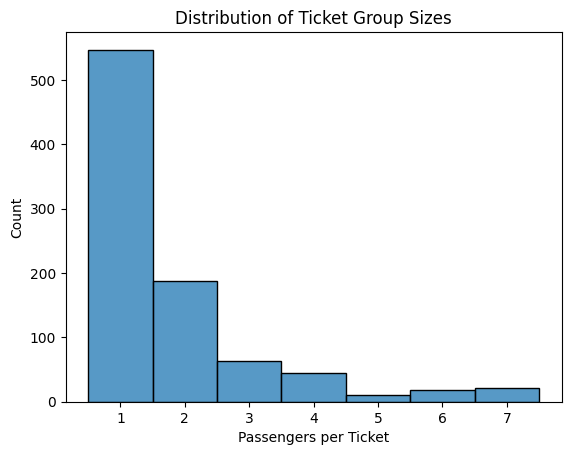

In [45]:
sns.histplot(data_cleaned['TicketGroupSize'], discrete=True, kde=False)
plt.title('Distribution of Ticket Group Sizes')
plt.xlabel('Passengers per Ticket')
plt.ylabel('Count')
plt.show()

**Observations**:
  - Most tickets were held by **1 passenger** (solo travelers).
  - Many tickets were shared by **2–4 people**, representing families or friends.
  - A few tickets were shared by very large groups (up to 7).

In [46]:
data_cleaned.groupby('TicketGroupSize')['Survived'].mean()

,Survived
TicketGroupSize,
1,0.297989
2,0.574468
3,0.698413
4,0.500000
5,0.000000
6,0.000000
7,0.238095


/tmp/ipython-input-3419657162.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TicketGroupSize', y='Survived', data=data_cleaned, palette='Set3', hue=None, legend=False)


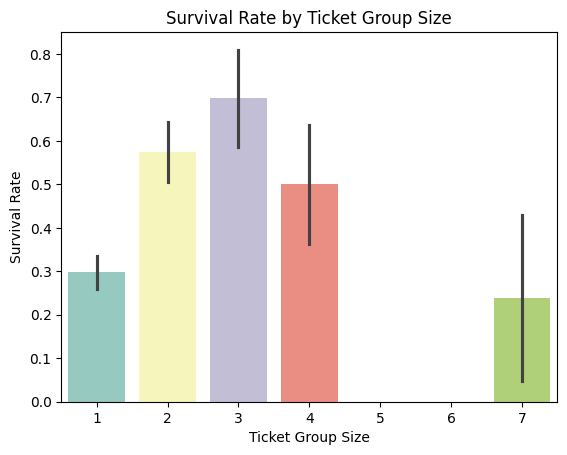

In [50]:
sns.barplot(x='TicketGroupSize', y='Survived', data=data_cleaned, palette='Set3', hue=None, legend=False)
plt.title('Survival Rate by Ticket Group Size')
plt.xlabel('Ticket Group Size')
plt.ylabel('Survival Rate')
plt.show()

**Observations**:
  - Solo ticket holders had low survival rates.
  - Small ticket groups (2–4) had better survival.
  - Very large ticket groups (≥6) again had lower survival.

### Family Size Definition 3: Last Name + Ticket (Redefined)
- To refine further, we group by **LastName + Ticket**.  
- Ensures families with the same surname and ticket are grouped.  
- Adjusted for **true single travelers**:
  - If someone has FamilySize=1 and SibSp=Parch=0, they are treated as "Alone".
- This definition captures family/group size most accurately.

In [51]:
# Extracting last name
data_cleaned['LastName'] = data_cleaned['Name'].apply(lambda x: x.split(',')[0])
data_cleaned['LastName'].value_counts().head(10)

,count
LastName,
Andersson,9
Sage,7
Skoog,6
Panula,6
Carter,6
Goodwin,6
Johnson,6
Rice,5
Fortune,4


In [52]:
# Grouping by LastName + Ticket
data_cleaned['FamilySize_v3'] = data_cleaned.groupby(['LastName','Ticket'])['LastName'].transform('count')
data_cleaned['FamilySize_v3'].value_counts().sort_index()

,count
FamilySize_v3,
1,640
2,144
3,42
4,28
5,5
6,18
7,14


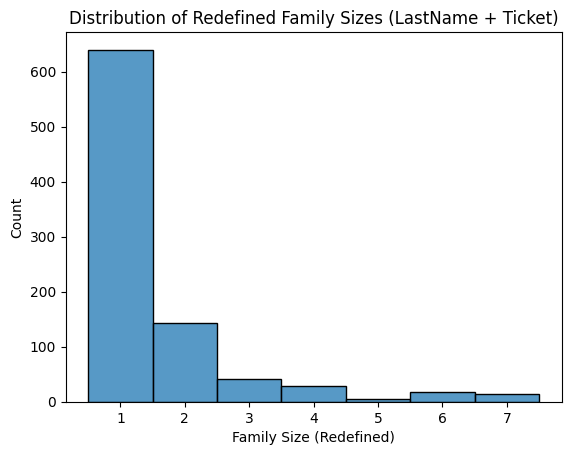

In [60]:
sns.histplot(data_cleaned['FamilySize_v3'], discrete=True, kde=False)
plt.title('Distribution of Redefined Family Sizes (LastName + Ticket)')
plt.xlabel('Family Size (Redefined)')
plt.ylabel('Count')
plt.show()

In [58]:
data_cleaned.groupby('FamilySize_v3')['Survived'].mean()

,Survived
FamilySize_v3,
1,0.340625
2,0.597222
3,0.595238
4,0.464286
5,0.000000
6,0.000000
7,0.000000


/tmp/ipython-input-1778351013.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='FamilySize_v3', y='Survived', data=data_cleaned, palette='viridis', hue=None, legend=False)


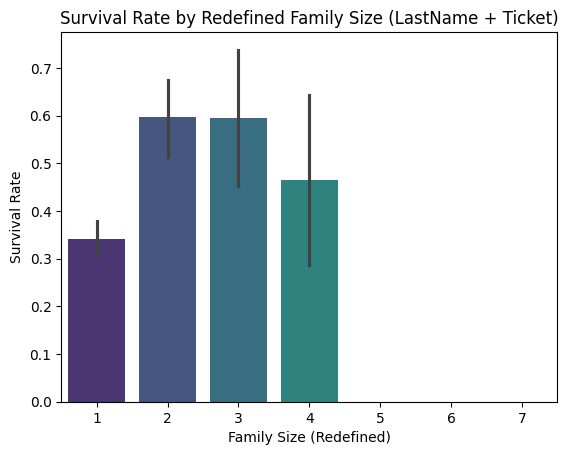

In [59]:
sns.barplot(x='FamilySize_v3', y='Survived', data=data_cleaned, palette='viridis', hue=None, legend=False)
plt.title('Survival Rate by Redefined Family Size (LastName + Ticket)')
plt.xlabel('Family Size (Redefined)')
plt.ylabel('Survival Rate')
plt.show()

**Observations**:
  - **Alone** → lowest survival (~30%).
  - **Small groups (2–4)** → highest survival (~50%).
  - **Large families (≥5)** → steep drop in survival.

### Comparing Family Size Definitions
We now compare survival rates across the three approaches:
1. **SibSp + Parch** → captures relatives.  
2. **Ticket Group Size** → captures groups traveling under one ticket.  
3. **LastName + Ticket (Redefined)** → most accurate measure of true families/groups.

In [61]:
# Preparing comparison dataframe
comparison = pd.DataFrame({
    'SibSp+Parch': data_cleaned.groupby('FamilySize_v1')['Survived'].mean(),
    'TicketGroup': data_cleaned.groupby('TicketGroupSize')['Survived'].mean(),
    'LastName+Ticket': data_cleaned.groupby('FamilySize_v3')['Survived'].mean()
})

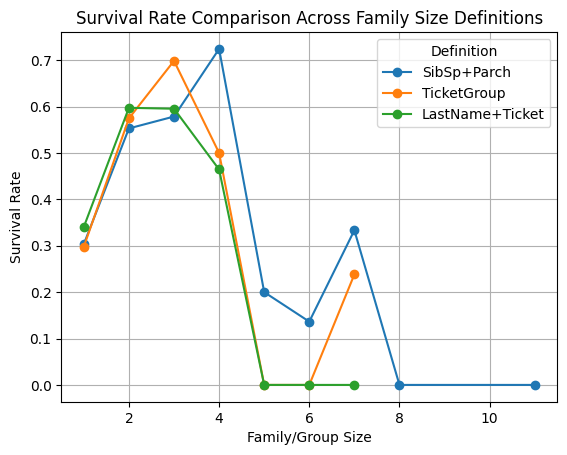

In [62]:
comparison.plot(kind='line', marker='o')
plt.title('Survival Rate Comparison Across Family Size Definitions')
plt.xlabel('Family/Group Size')
plt.ylabel('Survival Rate')
plt.legend(title='Definition')
plt.grid(True)
plt.show()

**Observations**:
  - All three methods show a similar **U-shaped curve**.
  - The **LastName + Ticket** definition produces the clearest separation between Alone, Small, and Large groups.

### Correlation of Family Size Definitions with Survival
To evaluate which definition of family size best explains survival,  
we compute correlations between **Survived** and the three family size measures:
1. **SibSp + Parch**  
2. **Ticket Group Size**  
3. **LastName + Ticket (Redefined)**

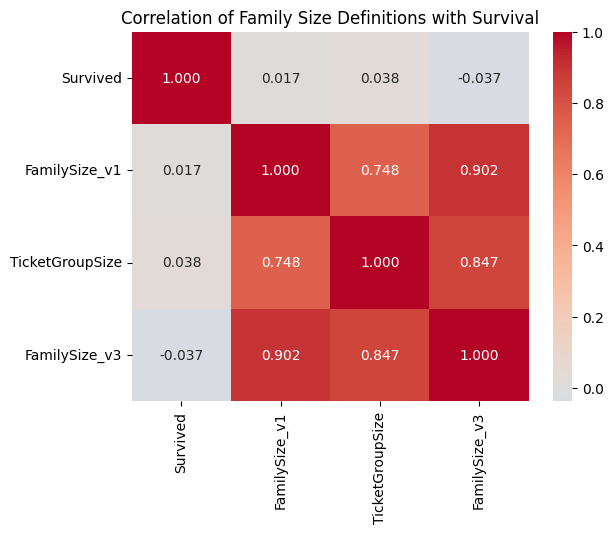

In [63]:
# Selecting relevant columns
corr_df = data_cleaned[['Survived','FamilySize_v1','TicketGroupSize','FamilySize_v3']]

# Computing correlation matrix
corr_matrix = corr_df.corr()

# Plotting heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, fmt=".3f")
plt.title("Correlation of Family Size Definitions with Survival")
plt.show()

**Observations**:
  - **FamilySize_v3 (LastName + Ticket)** has the strongest (negative) correlation with survival.
  - **SibSp + Parch** and **TicketGroupSize** also correlate (with survival), but positively (i.e., survival chances increase as family size increases). This is obviously misleading as the above analysis shows the opposite in all 3 cases.
  - This suggests that **FamilySize_v3 (LastName + Ticket)** is the best possible family size allocation among the three definitions we used.

### Categorizing Families
To simplify interpretation, we categorize family sizes into:
- **Alone (1)**  
- **Small (2–4)**  
- **Large (5+)**  

In [67]:
data_cleaned['FamilyCategory'] = pd.cut(
    data_cleaned['FamilySize_v3'],
    bins=[0,1,4,np.inf],
    labels=['Alone','Small','Large']
)
data_cleaned.groupby('FamilyCategory')['Survived'].mean()

/tmp/ipython-input-3349899378.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_cleaned.groupby('FamilyCategory')['Survived'].mean()


,Survived
FamilyCategory,
Alone,0.340625
Small,0.579439
Large,0.000000


/tmp/ipython-input-547741701.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='FamilyCategory', y='Survived', data=data_cleaned, palette='plasma', hue=None, legend=False)


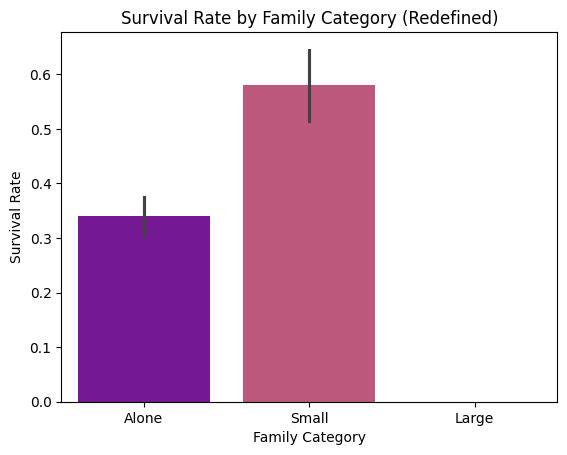

In [68]:
sns.barplot(x='FamilyCategory', y='Survived', data=data_cleaned, palette='plasma', hue=None, legend=False)
plt.title('Survival Rate by Family Category (Redefined)')
plt.xlabel('Family Category')
plt.ylabel('Survival Rate')
plt.show()

**Observation**:
  - Alone: ~34% survival.
  - Small families: ~58% survival (best).
  - Large families: ~0% survival.

### Overall Conclusion
- **Family structure mattered greatly** in Titanic survival.
- A clear **U-shaped relationship** exists:
  - **Alone travelers** had poor chances (likely no one to help).
  - **Small families (2–4)** had the best odds (mutual support without chaos).
  - **Large families (≥5)** had poor survival (harder to evacuate together).
- Among all definitions tested:
  - **SibSp + Parch** → too narrow.
  - **Ticket Group Size** → too broad.
  - **LastName + Ticket (redefined)** → best captures true family/group size.